In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ripser import ripser
from persim import plot_diagrams

In [2]:
## from R
experiment_results = [pd.read_csv(
    'data/dimension selection/experiment_result_' + str(i) + '.csv') for i in range(1, 9)]

In [3]:
## rename the columns of the 2nd experiment from Z.x and Z.y to Z.1 and Z.2     
experiment_results[2] = experiment_results[2].rename(
    columns={'Z.x': 'Z.1', 'Z.y': 'Z.2'})

experiment_results[6] = experiment_results[6].rename(
    columns={'Z.x': 'Z.1', 'Z.y': 'Z.2'})

## from the R results
elbow = [4, 5, 1, 2]
ladle = [5, 5, 4, 6]
beta0 = [6, 116, 1, 1]
beta1 = [0, 8, 0, 1]

for i in range(4):
    experiment_results[i]['elbow'] = elbow[i]
    experiment_results[i]['ladle'] = ladle[i]

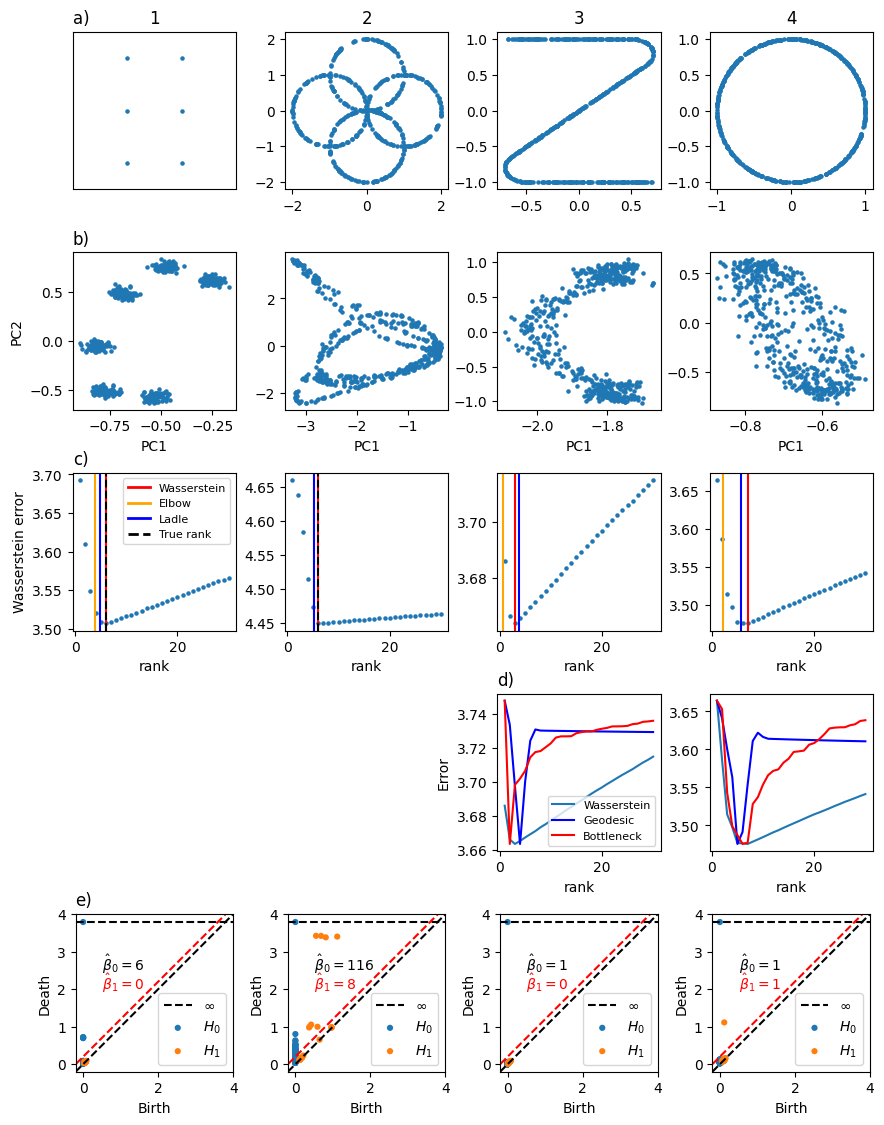

In [4]:
# Define the function e
def e():
    return np.random.normal(0, 0.2)


def scale(x, benchmark):
    return ((x - min(x)) / (max(x) - min(x))) * (max(benchmark) - min(benchmark)) + min(benchmark)


# Set up plot parameters
plt.figure(figsize=(10, 13))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3, hspace=0.4)

# Define a list to store persistent diagrams
pds = []

# Loop over values of kr (1 to 4)
for kr in range(1, 5):
    results = experiment_results[kr - 1]  # Assuming you have results for each kr

    # Create subplots
    plt.subplot(5, 4, kr)
    if kr > 1:
        if kr == 3:
            plt.scatter(results["Z.1"], results["Z.2"], s=5)
        else: 
            plt.scatter(results["Z.1"], results["Z.2"], s=5)
    else:
        plt.scatter(
            np.tile([1, 2], 3),
            np.repeat([1, 2, 3], 2),
            s=5
        )
        plt.xlim(0, 3)  # Set the x-axis limits
        plt.ylim(0.5, 3.5)  # Set the y-axis limits
        plt.xticks([])  # Turn off x-axis labels
        plt.yticks([])  # Turn off y-axis labels
    if kr == 1:
        plt.title("a)", loc="left")
    plt.title(str(kr), loc="center")

    # Plot PC1 vs PC2
    plt.subplot(5, 4, 4 + kr)
    plt.scatter(results['YPCA.PC1'], results["YPCA.PC2"], s=5)
    if kr == 1:
        plt.title("b)", loc="left")
    
    plt.xlabel("PC1")
    if kr == 1:
        plt.ylabel("PC2")
    
    # Dimension selection
    plt.subplot(5, 4, 8 + kr)
    plt.scatter(range(1, 31),np.log(results["ws"][:30]), s=5)
    plt.axvline(np.argmin(results["ws"]) +1, color="red")

    # print(results["ws"]['elbow'])
    plt.axvline(results['elbow'][0] + e(), color="orange")
    plt.axvline(results['ladle'][0] + e(), color="blue")

    plt.xlabel("rank")

    if kr <= 2:
        plt.axvline(results['rank'][0], color="black", linestyle="--")

    if kr == 1:
        plt.title("c)", loc="left")
        plt.ylabel("Wasserstein error")
        # Manually generate legend with specified labels
        legend_labels = ["Wasserstein", "Elbow", "Ladle", 'True rank']
        legend_colors = ['red', 'orange', 'blue', 'black']

        legend_handles = [plt.Line2D([0], [0], color=color, linestyle='--' if label == 'True rank' else '-', linewidth=2)
                        for color, label in zip(legend_colors, legend_labels)]
        plt.legend(legend_handles, legend_labels, loc='upper right', fontsize = 8)

# Geodesic error
for kr in range(1, 5):
    if kr >= 3:
        results = experiment_results[kr - 1]

        plt.subplot(5, 4, 12 + kr)
        plt.plot(range(1, 31),np.log(results["ws"])[:30])
        
        plt.xlabel("rank")
        
        plt.plot(range(1, 31), scale(
            np.log(results["geodesic_error"]), np.log(results["ws"]))[:30], color="blue")
        plt.plot(range(1, 31),
                 scale(np.log(results["bottleneck_error"]), np.log(results["ws"]))[:30], color="red")

        if kr == 3:
            plt.ylabel("Error")
            plt.legend(["Wasserstein", "Geodesic", "Bottleneck"],fontsize = 8)
            plt.title("d)", loc="left")

# Persistent diagrams
for kr in range(1, 5):
    results = experiment_results[kr - 1]
    rank = np.argmin(results["ws"])
    ypca_columns = [col for col in results.columns if 'YPCA.' in col]
    YPCA = results[ypca_columns].iloc[:, :rank]

    diagrams = ripser(YPCA)['dgms']

    plt.subplot(5, 4, 16 + kr)    

    plot_diagrams(diagrams, xy_range = [-0.2,4,-0.2,4], show=False)
    plt.plot([-0.4, 4.2], [-0.2, 4.4], "r--")

    plt.text(.5, 2.5, r"$\hat{\beta}_0 = " + str(beta0[kr-1]) + "$", fontsize=10)
    plt.text(.5, 2., r"$\hat{\beta}_1 = " + str(beta1[kr-1]) + "$", fontsize=10, color="red")
    if kr == 1:
        plt.title("e)", loc="left")

# plt.savefig('dim_select_plot.pdf')